<a href="https://colab.research.google.com/github/JonaJJSJ-crypto/IA-assited-programing4physics/blob/main/LeyDehooke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 1:
Genere una tabla con los datos de masa vs Elongacion. Y genere una columna que sea la razon entre Masa y Elongacion. Explique como esta columna se relaciona con la constante elastica del resorte.

In [ ]:
# prompt: Genera una tabla que contenga los siguientes datos. Masa:0,0.05,0.1,0.15,0.2, 0.150,0.1,0.05,0 y elongacion: 0,0.49,0.98,1.47,1.96,1.47,0.98,0.49,0. Y calcula una columna que sea la division entre los valores de masa sobre elongacion

import pandas as pd

data = {
    'Masa(kg)': [0, 0.05, 0.1, 0.15, 0.2, 0.150, 0.1, 0.05, 0],
    'Elongacion(m)': [0, 0.49, 0.98, 1.47, 1.96, 1.47, 0.98, 0.49, 0]
}

df = pd.DataFrame(data)

# Calcula la división entre Masa y Elongacion
df['Masa/Elongacion(kg/m)'] = df['Masa(kg)'] / df['Elongacion(m)']

# Reemplaza los valores infinitos o NaN con 0
df['Masa/Elongacion(kg/m)'].fillna(0, inplace=True)

df

<ipython-input-3-a552047bc517>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Masa/Elongacion(kg/m)'].fillna(0, inplace=True)


,Masa(kg),Elongacion(m),Masa/Elongacion(kg/m)
0,0.00,0.00,0.000000
1,0.05,0.49,0.102041
2,0.10,0.98,0.102041
3,0.15,1.47,0.102041
4,0.20,1.96,0.102041
5,0.15,1.47,0.102041
6,0.10,0.98,0.102041
7,0.05,0.49,0.102041
8,0.00,0.00,0.000000


#Tarea 2:
Genere un grafico de dispersion entre mas y elongación. Obtenga tambien la regresión lineal y grafique la linea de tendencia con Ecuacion y R-cuadrado. Discuca como se relaciona la pendiente de la funcion obtenida con la constante eslastia y que significa el R-cuadrado.

In [ ]:
# prompt: Puedes generar un scatter de Masa vs Elongacion obteniendo una regresion lineal con linea de tendencia y R-cuadrado

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Crear el scatter plot
plt.scatter(df['Masa(kg)'], df['Elongacion(m)'])
plt.xlabel('Masa(kg)')
plt.ylabel('Elongacion(m)')
plt.title('Scatter Plot Masa vs Elongacion')

# Calcular la regresión lineal
X = df['Masa(kg)'].values.reshape(-1, 1)
y = df['Elongacion(m)'].values
regressor = LinearRegression()
regressor.fit(X, y)

# Obtener la pendiente y la ordenada al origen
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Crear la línea de tendencia
y_pred = regressor.predict(X)
plt.plot(X, y_pred, color='red', label='Linea de Tendencia')

# Calcular el R-cuadrado
r_squared = regressor.score(X, y)

# Mostrar el R-cuadrado en el gráfico
plt.text(0.05, 1.8, f'R-cuadrado: {r_squared:.2f}', fontsize=12)

# Mostrar la ecuación de la recta en el gráfico
plt.text(0.05, 1.6, f'Ecuación: Elongacion = {slope:.2f}*Masa + {intercept:.2f}', fontsize=12)

plt.legend()
plt.show()

#Tarea 3:
Grafique como obtener el area encerrada bajo la curva obtenida en el paso anterior.Utilice los limites de elongación medidos (Los limites son la mayor elongación y la menor elongación). Gráfique el area y explique que unidades tiene el area, y cual es su significado Físico.

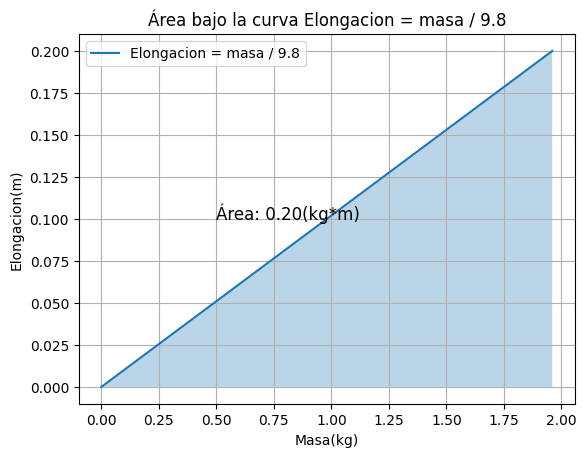

In [ ]:
# prompt: Puedes generar un codigo que calcule el area bajo la curva para la funcion y=x/9.8 y que se muestre de manera visual entre los rangos de x=0 a x=1.96

import numpy as np
import matplotlib.pyplot as plt

# Definir la función
def f(x):
  return x / 9.8

# Rango de x
x = np.linspace(0, 1.96, 100)

# Calcular los valores de y
y = f(x)

# Calcular el área bajo la curva usando la regla del trapecio
area = np.trapz(y, x)

# Crear la gráfica
plt.plot(x, y, label='Elongacion = masa / 9.8')
plt.fill_between(x, y, alpha=0.3)  # Rellena el área bajo la curva
plt.xlabel('Masa(kg)')
plt.ylabel('Elongacion(m)')
plt.title('Área bajo la curva Elongacion = masa / 9.8')
plt.text(0.5, 0.1, f'Área: {area:.2f}(kg*m)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()